# Building ACI Fabric access policies using python for 26 leafs.
We will be using this notebook as a python guide for creating access policies on our ACI fabric.
 
Following is a list of leafs we will be working with:

    Model    Qty    Ports
    X-108    14     48
    X-180    10     48
    X-FX-2   2      30
 
 26 Leafs in total [DC-B]. Ports in total: 1212

In [16]:
print('Total number of ports: ' + str(int((24 * 48) + (30 * 2))))

Total number of ports: 1212


Assuming the fabric has already been brought up, and all the leaf nodes are registered - we will proceed with building the access policies.

First, import a baseline python script that allows connection to our APIC.

Downloaded the latest update here: github.com/sahilabro/aci/ApicEM.py

The code that actually talks to the Apic is commented out for safety.

In [33]:
#Uncomment when connected to APIC
#import ApicEM

Next, we will build a VLAN Pool.

The same VLAN pool will be used for all access policies for simplicity sake.

The VLAN Pool will range from 1-3000

In [34]:
VLP_name = "VLP_deloitte1"
rangeFrom = "1"
rangeTo = "3000"
allocationMode = "static" #or dynamic
print("VLP is called %s,\nit ranges from %s \nto %s \nand the allocation mode is %s"%(VLP_name,rangeFrom,rangeTo,allocationMode))
#Uncommentline below to execute on Apic:
#print('executing...' + ApicEM.addVLP(VLP_name, rangeFrom, rangeTo, allocationMode))

VLP is called VLP_1-3000,
it ranges from 1 
to 3000 
and the allocation mode is static


This VLP is then associated to a physical domain.
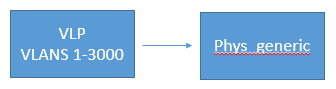
The physical domain is what binds our tenant-side objects to access policies in the end. More on that later.
We will use the same physical domain for all.
The following code creates a new physical domain and associates it to our VLP:

In [36]:
Phy_name = "Phys_deloitte"
#Uncommentline below to execute on Apic:
#print('Creating new Physical domain...' + ApicEM.createPHY(Phy_name, VLP_name))
#Note: VLP_name was created above

The physical domain attaches to an Attachable Entity Profile (AEP). 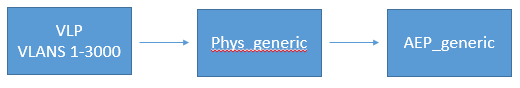
This AEP is what binds the domain to interface profiles, which are attached to actual interfaces on the fabric.

We will be using the same AEP across all for the same reasons.

In [37]:
AEP_name = "AEP_deloitte"
#Uncommentline below to execute on Apic:
#print("creating AEP.." + ApicEM.attachAEP(AEP_name, Phy_name))

The AEP attaches to policy groups. 

A Policy Group contains a group of L1/L2 policies that can be applied to an interface. This includes things like LLDP, CDP etc.

While it is possible to re-use the same policy group for simplistic single interfaces, it is not possible to do this with VPCs.

We will create a Policy Group for single interfaces first:

In [8]:
IntPolGrpName = "PolGrp_single_generic"
#Uncommentline below to execute on Apic:
#print(ApicEM.createIntPolGrp(IntPolGrpName, AEP_name, **kwargs))
#AEP created above used here

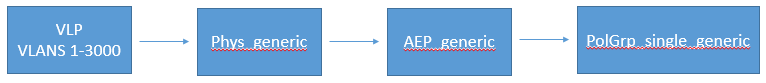
We will now create interface profiles.
Separate interface profiles created for each leaf switch. These will then be binded to the corresponding leafs using switch profiles
This is important as the port selectors are binded to specific policy groups under these interface profiles. 
We need separate policy groups for each VPC.
Assuming leafs range from 301 to 327
But let's for on single interfaces for now.

In [6]:
#Store leaf numbering in a list
leafs = [i for i in range(301,327)]
#Interfaces profiles will be named after our leafs
IntProfNames = ['IntProf_leaf_'+str(i) for i in leafs] #naming the interface profiles
for IntProfName in IntProfNames: print(IntProfName)
#Uncommentline below to execute on Apic:
#print([ApicEM.createIntProf(IntProfName) for IntProfName in IntProfNames])


IntProf_leaf_301
IntProf_leaf_302
IntProf_leaf_303
IntProf_leaf_304
IntProf_leaf_305
IntProf_leaf_306
IntProf_leaf_307
IntProf_leaf_308
IntProf_leaf_309
IntProf_leaf_310
IntProf_leaf_311
IntProf_leaf_312
IntProf_leaf_313
IntProf_leaf_314
IntProf_leaf_315
IntProf_leaf_316
IntProf_leaf_317
IntProf_leaf_318
IntProf_leaf_319
IntProf_leaf_320
IntProf_leaf_321
IntProf_leaf_322
IntProf_leaf_323
IntProf_leaf_324
IntProf_leaf_325
IntProf_leaf_326


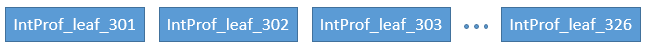
Assuming leafs 301=324 have 48 ports, and 325-326 have 30 ports each: we will now create port selectors under each of these interface profiles.

Each port selector has to be binded to a policy group. We will be binding all of them to the policy group we created above earlier.

In [9]:
#Naming the port selectors and storing in a list:
PortSelectors = ['PtSel_single_1-'+str(i) for i in range(1,49)]
#We will use ALL of the port selectors for leafs 301-324:
#for port in PortSelectors: print(port)
#print(leafs) #Check we still have the interfaceprofilenames from earlier
for IntProfName in IntProfNames[:24]:
    for port in PortSelectors:
        print("{:<25} {:<25} {:<25}".format(IntProfName,port,IntPolGrpName))
        #Uncommentline below to execute on Apic:
        #print(ApicEM.AddPortSeltoIntProf(IntProfName,port,port,IntPolGrpName))


IntProf_leaf_301          PtSel_single_1-1          PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-2          PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-3          PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-4          PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-5          PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-6          PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-7          PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-8          PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-9          PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-10         PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-11         PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-12         PolGrp_single_generic    
IntProf_leaf_301          PtSel_single_1-13         PolGrp_singl

Repeat the above for the last 2 leafs. 30 ports this time:

In [10]:
for IntProfName in IntProfNames[24:26]:
    for port in PortSelectors[:30]:
        print("{:<25} {:<25} {:<25}".format(IntProfName,port,IntPolGrpName))
        #Uncommentline below to execute on Apic:
        #print(ApicEM.AddPortSeltoIntProf(IntProfName,port,port,IntPolGrpName))

IntProf_leaf_325          PtSel_single_1-1          PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-2          PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-3          PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-4          PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-5          PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-6          PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-7          PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-8          PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-9          PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-10         PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-11         PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-12         PolGrp_single_generic    
IntProf_leaf_325          PtSel_single_1-13         PolGrp_singl

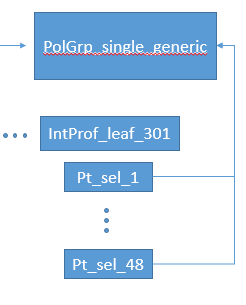

Now, we repeat the same for VPCs. Remember, VPCs also need a different policy group for each pair.
The port selector names will also have their respective leafs.
Let's dive right in:

In [18]:
#For each port in leaf with 48 ports. For each leaf pair: (301-302, 303-304...)
for Port in range(1,49):
    for i in range(0,len(leafs),2):
        if i < 23: #Only use list til the 24th element. 25th and 26th are 30 port leafs. Hard-coded.
            VPCPolGrpName = 'PolGrp_VPC_'+str(leafs[i])+'-'+str(leafs[i+1])+'_'+str(Port)
            #Uncommentline below to execute on Apic:
            #print(ApicEM.createVPCPolGrp(VPCPolGrpName, AEP_name, **kwargs))


            #And for VPC made, make two Port-Selectors in their respective interface profiles
            #Store IntProfNames in a list first:
            VPCIntProfNames = ['IntProf_leaf_'+str(leafs[i]),'IntProf_leaf_'+str(leafs[i+1])]
            for IntProfName in VPCIntProfNames:
                print("{:<25} {:<25} {:<25}".format(IntProfName,VPCPolGrpName,Port))
                #print(ApicEM.AddPortSeltoIntProf(IntProfName,Port,Port,VPCPolGrpName))



IntProf_leaf_301          PolGrp_VPC_301-302_1      1                        
IntProf_leaf_302          PolGrp_VPC_301-302_1      1                        
IntProf_leaf_303          PolGrp_VPC_303-304_1      1                        
IntProf_leaf_304          PolGrp_VPC_303-304_1      1                        
IntProf_leaf_305          PolGrp_VPC_305-306_1      1                        
IntProf_leaf_306          PolGrp_VPC_305-306_1      1                        
IntProf_leaf_307          PolGrp_VPC_307-308_1      1                        
IntProf_leaf_308          PolGrp_VPC_307-308_1      1                        
IntProf_leaf_309          PolGrp_VPC_309-310_1      1                        
IntProf_leaf_310          PolGrp_VPC_309-310_1      1                        
IntProf_leaf_311          PolGrp_VPC_311-312_1      1                        
IntProf_leaf_312          PolGrp_VPC_311-312_1      1                        
IntProf_leaf_313          PolGrp_VPC_313-314_1      1           

Repeat above for last pair (325-326)

In [27]:
#For each port in leaf with 30 ports. For last leaf pair: (325-326)
for Port in range(1,31):
    for i in range(24,len(leafs),2):
        if i < 25:
            VPCPolGrpName = 'PolGrp_VPC_'+str(leafs[i])+'-'+str(leafs[i+1])+'_'+str(Port)
            #Uncommentline below to execute on Apic:
            #print(ApicEM.createVPCPolGrp(VPCPolGrpName, AEP_name, **kwargs))


            #And for VPC made, make two Port-Selectors in their respective interface profiles
            #Store IntProfNames in a list first:
            VPCIntProfNames = ['IntProf_leaf_'+str(leafs[i]),'IntProf_leaf_'+str(leafs[i+1])]
            for IntProfName in VPCIntProfNames:
                print("{:<25} {:<25} {:<25}".format(IntProfName,VPCPolGrpName,Port))
                #print(ApicEM.AddPortSeltoIntProf(IntProfName,Port,Port,VPCPolGrpName))

IntProf_leaf_325          PolGrp_VPC_325-326_1      1                        
IntProf_leaf_326          PolGrp_VPC_325-326_1      1                        
IntProf_leaf_325          PolGrp_VPC_325-326_2      2                        
IntProf_leaf_326          PolGrp_VPC_325-326_2      2                        
IntProf_leaf_325          PolGrp_VPC_325-326_3      3                        
IntProf_leaf_326          PolGrp_VPC_325-326_3      3                        
IntProf_leaf_325          PolGrp_VPC_325-326_4      4                        
IntProf_leaf_326          PolGrp_VPC_325-326_4      4                        
IntProf_leaf_325          PolGrp_VPC_325-326_5      5                        
IntProf_leaf_326          PolGrp_VPC_325-326_5      5                        
IntProf_leaf_325          PolGrp_VPC_325-326_6      6                        
IntProf_leaf_326          PolGrp_VPC_325-326_6      6                        
IntProf_leaf_325          PolGrp_VPC_325-326_7      7           

At this point, we have unique port selectors with VPC policies attached to them (one VPC policy per pair). 
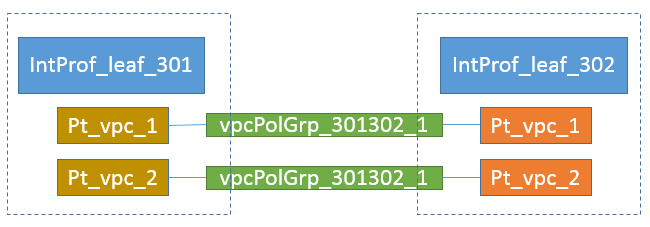
Interface 1/1 on leaf 301 and Interface 1/1 on leaf 302 would go into the same VPC PolGrp and so on.

These port selectors live in their specific interface profiles, however the interface profiles are not actually binded to specific leaf switches yet. Therefore the VPC policies will not be formed.

Next, we create switch profiles, select specific physical leafs under them. And then finally: associate them to our interface profiles:

In [30]:
for i in range(len(leafs)):
    SwitchProfName = 'SwProf_'+str(leafs[i])
    SwitchSelectorName = leafs[i]
    Switch = leafs[i]
    IntProfName = IntProfNames[i]
    print("{:<25} {:<25} {:<25}".format(IntProfName,SwitchProfName,Switch))
    #Uncomment below to execute on APIC
    #print(ApicEM.createSwitchProf(SwitchProfName))
    #print(ApicEM.AddLeafSeltoSwitchProf(SwitchProfName,SwitchSelectorName,Switch, **kwargs))
    #print(ApicEM.addIntProfToSwitchProf(SwitchProfName, IntProfName))


IntProf_leaf_301          SwProf_301                301                      
IntProf_leaf_302          SwProf_302                302                      
IntProf_leaf_303          SwProf_303                303                      
IntProf_leaf_304          SwProf_304                304                      
IntProf_leaf_305          SwProf_305                305                      
IntProf_leaf_306          SwProf_306                306                      
IntProf_leaf_307          SwProf_307                307                      
IntProf_leaf_308          SwProf_308                308                      
IntProf_leaf_309          SwProf_309                309                      
IntProf_leaf_310          SwProf_310                310                      
IntProf_leaf_311          SwProf_311                311                      
IntProf_leaf_312          SwProf_312                312                      
IntProf_leaf_313          SwProf_313                313         

And finally..
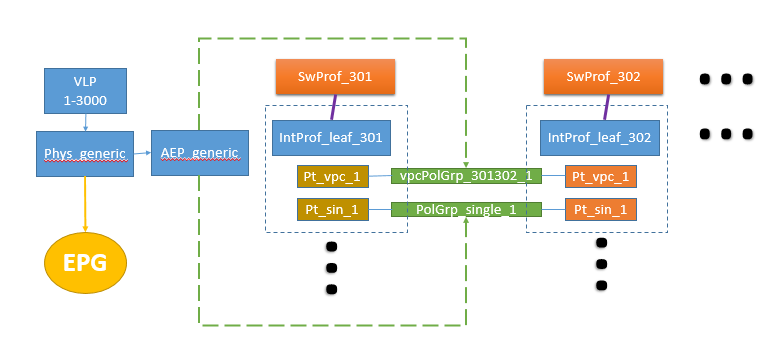